<a href="https://colab.research.google.com/github/AliMamaghani1999/DeepLearning-HW2/blob/main/HW2_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ali Mamaghani
401200306

# Part-A

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data_tr=datasets.FashionMNIST(root='/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data',
                           train=True,
                           download=True,
                           transform=ToTensor()
                          )
data_te=datasets.FashionMNIST(root='/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data',
                           train=False,
                           download=True,
                           transform=ToTensor()
                          )


In [3]:
dataclass={"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[]}
for i in range(60000):
  dataclass[str(data_tr[i][1])].append(i)

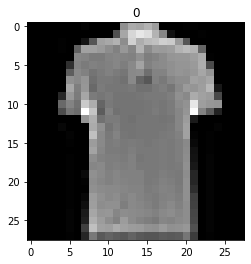

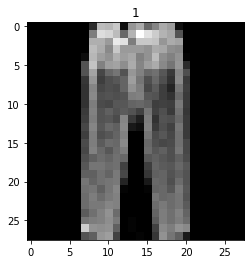

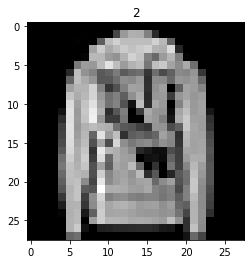

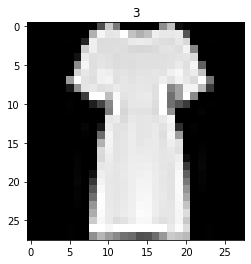

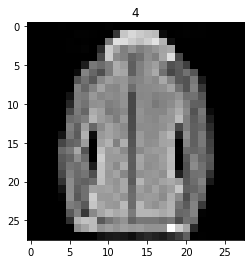

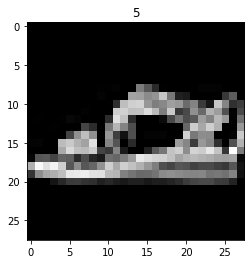

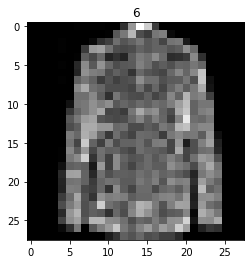

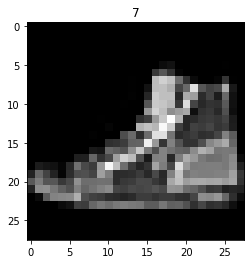

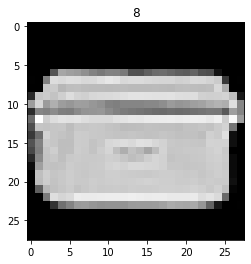

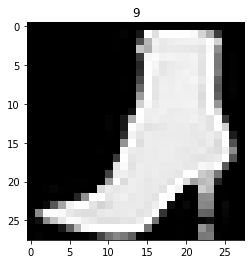

In [4]:
import random
for i in range(10):
  img,c_num=data_tr[random.choice(dataclass[str(i)])]
  #print("lable_number",c_num)
  plt.imshow(img[0],cmap="gray")
  plt.title(c_num)
  plt.show()


# Part-B

In [ ]:
def my_Linear(X,W ,b):
  return W.T @ X + b

In [ ]:
def my_ReLU(x):
  return torch.maximum(x,torch.zeros_like(x))

In [ ]:
def my_softmax(x):
 y=torch.exp(x)
 return y/sum(y)

In [ ]:
class my_NeuralNetwork():
    def __init__(self):
        self.W1 = 0.05*torch.randn(28*28, 512)
        self.W1.requires_grad_()
        self.b1=0.05*torch.randn(512, 1)
        self.b1.requires_grad_()
        self.W2 = 0.05*torch.randn(512, 128)
        self.W2.requires_grad_()
        self.b2=0.05*torch.randn(128, 1)
        self.b2.requires_grad_()
        self.W3 = 0.05*torch.randn(128, 32)
        self.W3.requires_grad_()
        self.b3=0.05*torch.randn(32, 1)
        self.b3.requires_grad_()
        self.W4 = 0.05*torch.randn(32, 10)
        self.W4.requires_grad_()
        self.b4=0.05*torch.randn(10, 1)
        self.b4.requires_grad_()
        
        self.linear1 = my_Linear
        self.relu1 = my_ReLU
        self.linear2 = my_Linear
        self.relu2 = my_ReLU
        self.linear3 = my_Linear
        self.relu3 = my_ReLU
        self.linear4 = my_Linear
        self.softmax=my_softmax
    def forward(self, x):
        x = x.reshape(-1,1)
        x = self.linear1(x,self.W1,self.b1)
        x = self.relu1(x)
        x = self.linear2(x,self.W2,self.b2)
        x = self.relu2(x)
        x = self.linear3(x,self.W3,self.b3)
        x = self.relu3(x)
        x = self.linear4(x,self.W4,self.b4)
        y = self.softmax(x)
        return y

In [ ]:
model=my_NeuralNetwork()

In [ ]:
print(model.forward(data_tr[0][0]).argmax()==data_tr[0][1])
#print(data_tr[0][1])
#model.W1.requires_grad

tensor(False)


# Part-C

In [ ]:
def loss(y,yp):
  return -(y * torch.log10(yp)).sum()


In [ ]:
for i in range(10):
  
  for j in range(600):
    img,lable=data_tr[j]
    yb=model.forward(img)
    yr=torch.zeros([10,1])
    err=torch.zeros([1,1])
    for k in range(100):
      img,lable=data_tr[j*100+k]
      yr=torch.zeros([10,1])
      yb=model.forward(img)
      yr[lable,0]=1
      err+=loss(yr,yb)
    err.backward()
    with torch.no_grad():
      model.W4 -= 0.001*model.W4.grad
      model.b4 -= 0.001*model.b4.grad
      model.W3 -= 0.001*model.W3.grad
      model.b3 -= 0.001*model.b3.grad
      model.W2 -= 0.001*model.W2.grad
      model.b2 -= 0.001*model.b2.grad
      model.W1 -= 0.001*model.W1.grad
      model.b1 -= 0.001*model.b1.grad
      model.W4.grad.zero_()
      model.W3.grad.zero_()
      model.W2.grad.zero_()
      model.W1.grad.zero_()
      model.b1.grad.zero_()
      model.b2.grad.zero_()
      model.b3.grad.zero_()
      model.b4.grad.zero_()
  t=0
  for ml in data_tr:
    t+=model.forward(ml[0]).argmax()==ml[1]
  print("epoch",i+1)
  print("train accuracy=",t*100/60000)

  t=0
  for ml in data_te:
    t+=model.forward(ml[0]).argmax()==ml[1]
  print("test accuracy=",t*100/10000)


epoch 1
train accuracy= tensor(77.7300)
test accuracy= tensor(76.5000)
epoch 2
train accuracy= tensor(82.5767)
test accuracy= tensor(81.3100)
epoch 3
train accuracy= tensor(85.0400)
test accuracy= tensor(83.4400)
epoch 4
train accuracy= tensor(86.3367)
test accuracy= tensor(84.7700)
epoch 5
train accuracy= tensor(87.2417)
test accuracy= tensor(85.6400)
epoch 6
train accuracy= tensor(87.9750)
test accuracy= tensor(86.2800)
epoch 7
train accuracy= tensor(88.4717)
test accuracy= tensor(86.5100)
epoch 8
train accuracy= tensor(88.8300)
test accuracy= tensor(86.7400)
epoch 9
train accuracy= tensor(89.1217)
test accuracy= tensor(86.8900)
epoch 10
train accuracy= tensor(89.2833)
test accuracy= tensor(86.8500)


In [ ]:
# saving
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/model.pth')


In [ ]:
# loading
model = torch.load('/content/drive/MyDrive/Colab Notebooks/Data2/HW2_data/model.pth')
model.eval()

In [ ]:
t=0
for i in data_te:
  t+=model.forward(i[0]).argmax()==i[1]
  


In [ ]:
print(t/10000)

tensor(0.8685)


# Part-D

The accuracy of the model in test data = 86.85%

lable_number= 0
predicted_lable_numver= tensor(0)


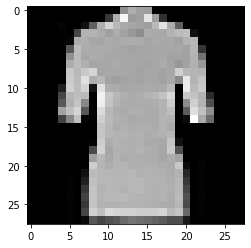

lable_number= 7
predicted_lable_numver= tensor(7)


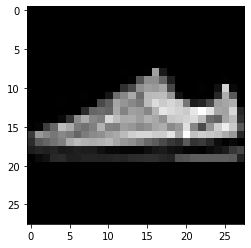

lable_number= 4
predicted_lable_numver= tensor(4)


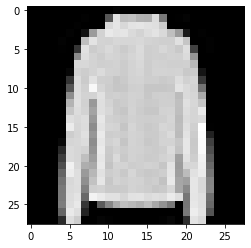

lable_number= 6
predicted_lable_numver= tensor(6)


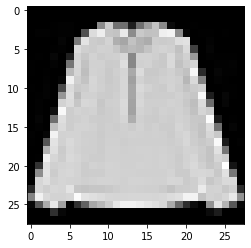

lable_number= 6
predicted_lable_numver= tensor(6)


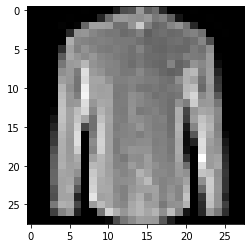

lable_number= 2
predicted_lable_numver= tensor(2)


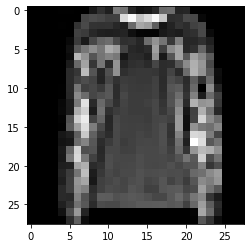

lable_number= 5
predicted_lable_numver= tensor(5)


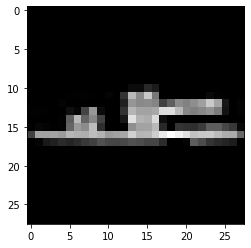

lable_number= 8
predicted_lable_numver= tensor(8)


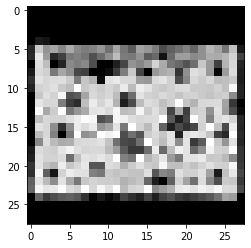

lable_number= 5
predicted_lable_numver= tensor(5)


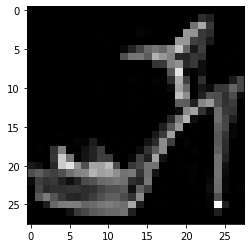

lable_number= 6
predicted_lable_numver= tensor(6)


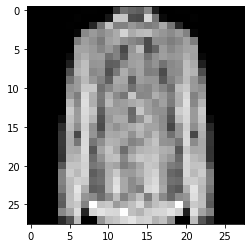

In [ ]:
import random
for i in range(10):
  img,c_num=random.choice(data_te)
  print("lable_number=",c_num)
  print("predicted_lable_numver=",model.forward(img).argmax())
  plt.imshow(img[0],cmap="gray")
  plt.show()
